In [1]:
setwd("..")

In [2]:
source("Source/functions.R")
library("data.table")
library("uwot")
library("RColorBrewer")

Loading required package: Matrix



In [3]:
inherited_altasin_bymito_byposmut <- fread(file = "Report/SNVs/hierarchy/inherited_noctrl_altasin_bymito_byposmut.csv")
inherited_altasin_bymito_byposmut <- inherited_altasin_bymito_byposmut[IsCtrl == "N" & MouseID != "Mouse16&17"]

No imputation

13:29:18 UMAP embedding parameters a = 0.583 b = 1.334

13:29:18 Setting random seed 42

13:29:19 Read 1468 rows and found 5 numeric columns

13:29:19 Using FNN for neighbor search, n_neighbors = 15

13:29:19 Commencing smooth kNN distance calibration using 8 threads
 with target n_neighbors = 15

13:29:19 16 smooth knn distance failures

13:29:19 Initializing from normalized Laplacian + noise (using irlba)

13:29:19 Commencing optimization for 500 epochs, with 27666 positive edges

13:29:20 Optimization finished



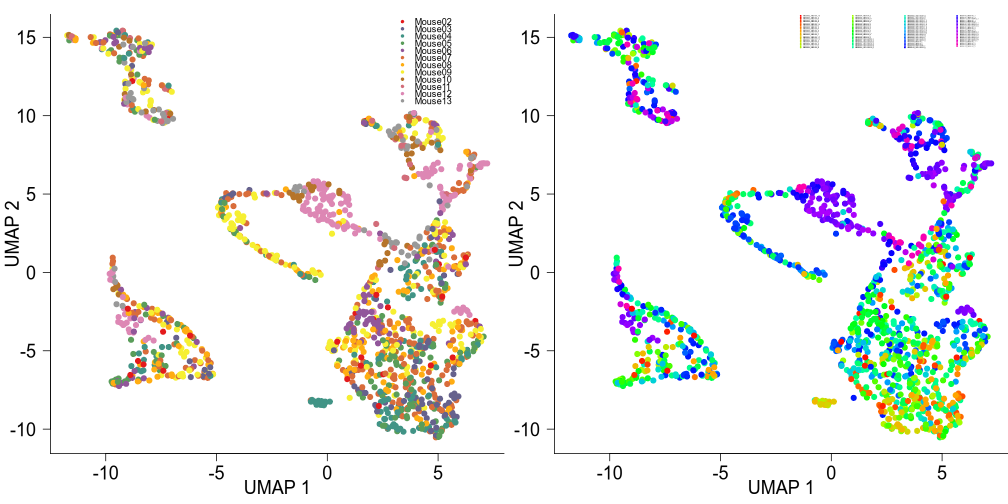

In [4]:
inherited_altasin_mat <- inherited_altasin_bymito_byposmut[, -(1:20)][, apply(.SD, 2, as.numeric)]
rownames(inherited_altasin_mat) <- inherited_altasin_bymito_byposmut[, LibraryMitoID]
colnames(inherited_altasin_mat) <- colnames(inherited_altasin_bymito_byposmut)[-(1:20)]
inherited_altasin_mat[is.na(inherited_altasin_mat)] <- 0
inherited_altasin_umap <- umap(prcomp(inherited_altasin_mat)$x[, 1:5], metric = "euclidean", n_components = 2, n_neighbors = 15, min_dist = 0.5, spread = 1, verbose = TRUE, seed = 42, n_epochs = 500)

options(repr.plot.width = 14, repr.plot.height = 7, repr.plot.res = 72)
par(ps = 18, las = 1, lend = 2, ljoin = 1, bty = "L", mfrow = c(1, 2), mar = c(3.5, 3.5, 1, 0), oma = c(0, 0, 0, 0), mgp = c(2.0, 1.0, 0))
plot(inherited_altasin_umap, col = colorRampPalette(brewer.pal(n = 9, "Set1"))(inherited_altasin_bymito_byposmut[, uniqueN(MouseID)])[factor(inherited_altasin_bymito_byposmut[, MouseID])], pch = 19, cex = 1, xlab = "UMAP 1", ylab = "UMAP 2")
legend("topright", col = colorRampPalette(brewer.pal(n = 9, "Set1"))(inherited_altasin_bymito_byposmut[, uniqueN(MouseID)]), legend = levels(factor(inherited_altasin_bymito_byposmut[, MouseID])), pch = 19, bty = "n", cex = 0.5)
plot(inherited_altasin_umap, col = colorRampPalette(rainbow(9))(inherited_altasin_bymito_byposmut[, uniqueN(CellUID)])[factor(inherited_altasin_bymito_byposmut[, CellUID])], pch = 19, cex = 1, xlab = "UMAP 1", ylab = "UMAP 2")
legend("topright", col = colorRampPalette(rainbow(9))(inherited_altasin_bymito_byposmut[, uniqueN(CellUID)]), legend = levels(factor(inherited_altasin_bymito_byposmut[, CellUID])), pch = 19, bty = "n", cex = 0.1, ncol = 4)

Imputation by grand mean

13:29:21 UMAP embedding parameters a = 0.583 b = 1.334

13:29:21 Setting random seed 42



13:29:21 Read 1468 rows and found 5 numeric columns

13:29:21 Using FNN for neighbor search, n_neighbors = 15

13:29:21 Commencing smooth kNN distance calibration using 8 threads
 with target n_neighbors = 15

13:29:21 Initializing from normalized Laplacian + noise (using irlba)

13:29:21 Commencing optimization for 500 epochs, with 28224 positive edges

13:29:22 Optimization finished



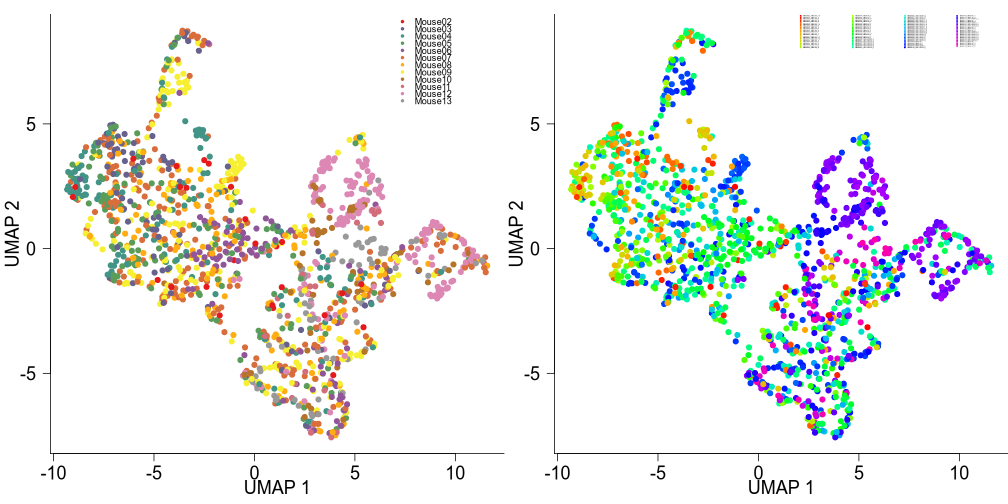

In [5]:
inherited_altasin_mat <- inherited_altasin_bymito_byposmut[, -(1:20)][, apply(.SD, 2, as.numeric)]
rownames(inherited_altasin_mat) <- inherited_altasin_bymito_byposmut[, LibraryMitoID]
colnames(inherited_altasin_mat) <- colnames(inherited_altasin_bymito_byposmut)[-(1:20)]
inherited_altasin_mat <- apply(inherited_altasin_mat, 2, function(x) replace(x, is.na(x), mean(x, na.rm = TRUE)))
inherited_altasin_umap <- umap(prcomp(inherited_altasin_mat)$x[, 1:5], metric = "euclidean", n_components = 2, n_neighbors = 15, min_dist = 0.5, spread = 1, verbose = TRUE, seed = 42, n_epochs = 500)

options(repr.plot.width = 14, repr.plot.height = 7, repr.plot.res = 72)
par(ps = 18, las = 1, lend = 2, ljoin = 1, bty = "L", mfrow = c(1, 2), mar = c(3.5, 3.5, 1, 0), oma = c(0, 0, 0, 0), mgp = c(2.0, 1.0, 0))
plot(inherited_altasin_umap, col = colorRampPalette(brewer.pal(n = 9, "Set1"))(inherited_altasin_bymito_byposmut[, uniqueN(MouseID)])[factor(inherited_altasin_bymito_byposmut[, MouseID])], pch = 19, cex = 1, xlab = "UMAP 1", ylab = "UMAP 2")
legend("topright", col = colorRampPalette(brewer.pal(n = 9, "Set1"))(inherited_altasin_bymito_byposmut[, uniqueN(MouseID)]), legend = levels(factor(inherited_altasin_bymito_byposmut[, MouseID])), pch = 19, bty = "n", cex = 0.5)
plot(inherited_altasin_umap, col = colorRampPalette(rainbow(9))(inherited_altasin_bymito_byposmut[, uniqueN(CellUID)])[factor(inherited_altasin_bymito_byposmut[, CellUID])], pch = 19, cex = 1, xlab = "UMAP 1", ylab = "UMAP 2")
legend("topright", col = colorRampPalette(rainbow(9))(inherited_altasin_bymito_byposmut[, uniqueN(CellUID)]), legend = levels(factor(inherited_altasin_bymito_byposmut[, CellUID])), pch = 19, bty = "n", cex = 0.1, ncol = 4)

Imputation by mouse average

13:32:10 UMAP embedding parameters a = 0.7669 b = 1.223

13:32:10 Setting random seed 42

13:32:10 Read 1468 rows and found 5 numeric columns

13:32:10 Using FNN for neighbor search, n_neighbors = 15

13:32:10 Commencing smooth kNN distance calibration using 8 threads
 with target n_neighbors = 15

13:32:10 Initializing from normalized Laplacian + noise (using irlba)

13:32:10 Commencing optimization for 500 epochs, with 28612 positive edges

13:32:11 Optimization finished



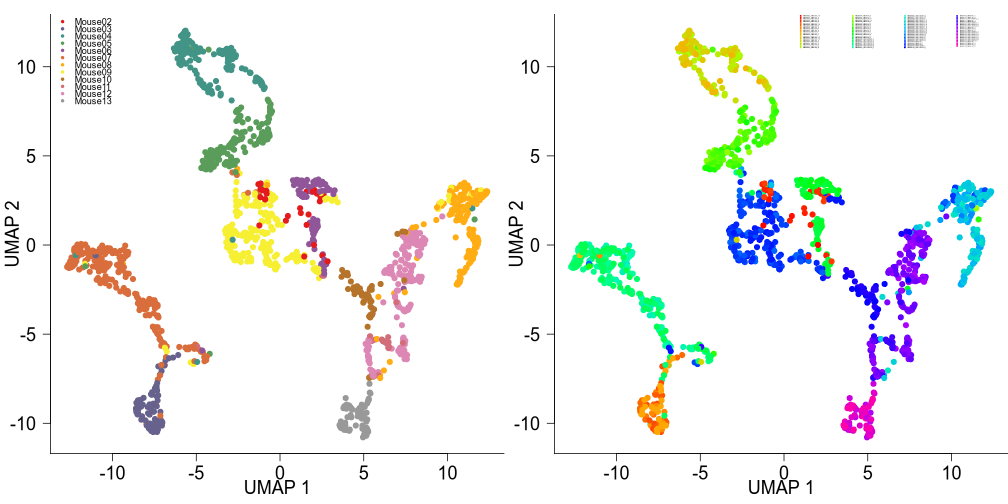

In [6]:
inherited_altasin_mat <- inherited_altasin_bymito_byposmut[, -(1:20)][, apply(.SD, 2, as.numeric)]
inherited_altasin_meanbymouse <- do.call(rbind, by(inherited_altasin_mat, INDICES = inherited_altasin_bymito_byposmut[, MouseID], FUN = function(X) colMeans(X, na.rm = TRUE)))
inherited_altasin_meanbymouse <- apply(inherited_altasin_meanbymouse, 2, function(x) replace(x, is.na(x), mean(x, na.rm = TRUE)))
inherited_altasin_mat <- inherited_altasin_bymito_byposmut[, -(1:20)][, apply(.SD, 2, as.numeric)]
rownames(inherited_altasin_mat) <- inherited_altasin_bymito_byposmut[, LibraryMitoID]
colnames(inherited_altasin_mat) <- colnames(inherited_altasin_bymito_byposmut)[-(1:20)]
inherited_altasin_mat <- sapply(colnames(inherited_altasin_mat), function(s) {
    sapply(rownames(inherited_altasin_mat), function(m) {
        x <- inherited_altasin_mat[m, s]
        if (is.na(x)) {
            k <- inherited_altasin_bymito_byposmut[LibraryMitoID == m, MouseID]
            inherited_altasin_meanbymouse[k, s]
        } else {
            x
        }
    })
})
inherited_altasin_umap <- umap(prcomp(inherited_altasin_mat)$x[, 1:5], metric = "euclidean", n_components = 2, n_neighbors = 15, min_dist = 0.4, spread = 1, verbose = TRUE, seed = 42, n_epochs = 500)

options(repr.plot.width = 14, repr.plot.height = 7, repr.plot.res = 72)
par(ps = 18, las = 1, lend = 2, ljoin = 1, bty = "L", mfrow = c(1, 2), mar = c(3.5, 3.5, 1, 0), oma = c(0, 0, 0, 0), mgp = c(2.0, 1.0, 0))
plot(inherited_altasin_umap, col = colorRampPalette(brewer.pal(n = 9, "Set1"))(inherited_altasin_bymito_byposmut[, uniqueN(MouseID)])[factor(inherited_altasin_bymito_byposmut[, MouseID])], pch = 19, cex = 1, xlab = "UMAP 1", ylab = "UMAP 2")
legend("topleft", col = colorRampPalette(brewer.pal(n = 9, "Set1"))(inherited_altasin_bymito_byposmut[, uniqueN(MouseID)]), legend = levels(factor(inherited_altasin_bymito_byposmut[, MouseID])), pch = 19, bty = "n", cex = 0.5)
plot(inherited_altasin_umap, col = colorRampPalette(rainbow(9))(inherited_altasin_bymito_byposmut[, uniqueN(CellUID)])[factor(inherited_altasin_bymito_byposmut[, CellUID])], pch = 19, cex = 1, xlab = "UMAP 1", ylab = "UMAP 2")
legend("topright", col = colorRampPalette(rainbow(9))(inherited_altasin_bymito_byposmut[, uniqueN(CellUID)]), legend = levels(factor(inherited_altasin_bymito_byposmut[, CellUID])), pch = 19, bty = "n", cex = 0.1, ncol = 4)

In [7]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: openSUSE Tumbleweed

Matrix products: default
BLAS:   /home/lenovo/Applications/R/4.4.0/lib64/R/lib/libRblas.so 
LAPACK: /home/lenovo/Applications/R/4.4.0/lib64/R/lib/libRlapack.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] RColorBrewer_1.1-3 uwot_0.2.2         Matrix_1.7-0       data.table_1.16.2 

loaded via a namespace (and not attached):
 [1] crayon_1.5.3      vctrs_0.6.5       cli_3.6.3